<a href="https://colab.research.google.com/github/ihabiba/NLP-Labs/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One-Hot Encoding Example

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 1: input text (list of sentences/documents)
texts = [
    "I love NLP",
    "NLP is amazing",
    "I love machine learning"
]

# Step 2: create CountVectorizer with binary=True for one-hot style features
vectorizer = CountVectorizer(binary=True)

# Step 3: learn vocabulary + transform texts into matrix
X = vectorizer.fit_transform(texts)

# Step 4: get feature (word) names
vocab = vectorizer.get_feature_names_out()

# Step 5: turn sparse matrix into DataFrame for visualization
df = pd.DataFrame(X.toarray(), columns=vocab)

print(df)

   amazing  is  learning  love  machine  nlp
0        0   0         0     1        0    1
1        1   1         0     0        0    1
2        0   0         1     1        1    0


# N-grams Example

### (unigrams, bigrams, trigrams separately)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["I love NLP. NLP is amazing!"]

# Unigrams
unigram_vectorizer = CountVectorizer(ngram_range=(1, 1))
unigram_matrix = unigram_vectorizer.fit_transform(text)
unigrams = unigram_vectorizer.get_feature_names_out()
print("Unigrams:")
print(unigrams)

# Bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
bigram_matrix = bigram_vectorizer.fit_transform(text)
bigrams = bigram_vectorizer.get_feature_names_out()
print("\nBigrams:")
print(bigrams)

# Trigrams
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3))
trigram_matrix = trigram_vectorizer.fit_transform(text)
trigrams = trigram_vectorizer.get_feature_names_out()
print("\nTrigrams:")
print(trigrams)

Unigrams:
['amazing' 'is' 'love' 'nlp']

Bigrams:
['is amazing' 'love nlp' 'nlp is' 'nlp nlp']

Trigrams:
['love nlp nlp' 'nlp is amazing' 'nlp nlp is']


### All together (1–3 grams)

In [3]:
vectorizer = CountVectorizer(ngram_range=(1, 3))
matrix = vectorizer.fit_transform(text)
features = vectorizer.get_feature_names_out()
print("\nAll n-grams:")
print(features)


All n-grams:
['amazing' 'is' 'is amazing' 'love' 'love nlp' 'love nlp nlp' 'nlp'
 'nlp is' 'nlp is amazing' 'nlp nlp' 'nlp nlp is']


# TF-IDF Example

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Input text (small corpus)
text = [
    "I love programming in Python",
    "Python programming is fun",
    "I love NLP and programming",
    "NLP is amazing and fun"
]

# Step 2: Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Step 3: Fit and transform
tfidf_matrix = tfidf_vectorizer.fit_transform(text)

# Step 4: Get vocabulary (feature names)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Step 5: Convert to DataFrame
df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Step 6: Show matrix
print("TF-IDF Feature Matrix:")
print(df)

TF-IDF Feature Matrix:
    amazing       and       fun        in        is      love       nlp  \
0  0.000000  0.000000  0.000000  0.614226  0.000000  0.484263  0.000000   
1  0.000000  0.000000  0.523035  0.000000  0.523035  0.000000  0.000000   
2  0.000000  0.523035  0.000000  0.000000  0.000000  0.523035  0.523035   
3  0.535566  0.422247  0.422247  0.000000  0.422247  0.000000  0.422247   

   programming    python  
0     0.392053  0.484263  
1     0.423442  0.523035  
2     0.423442  0.000000  
3     0.000000  0.000000  


# Word Embeddings (Word2Vec + T-SNE)

In [6]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 49.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


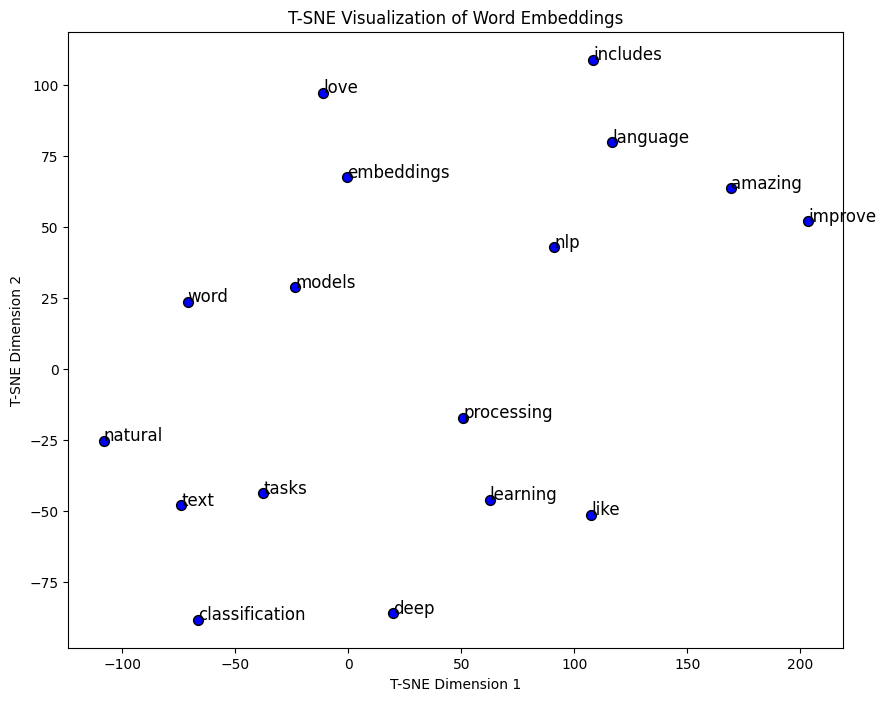

In [8]:
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Step 1: Define input text (corpus)
text = [
    "I love natural language processing",
    "Word embeddings are amazing for NLP",
    "NLP includes tasks like text classification",
    "Deep learning models improve word embeddings"
]

# Step 2: Tokenize and clean
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Added to resolve LookupError
stop_words = set(stopwords.words('english'))

tokenized_sentences = []
for sentence in text:
    tokens = word_tokenize(sentence.lower())
    filtered_tokens = [
        word for word in tokens
        if word.isalnum() and word not in stop_words
    ]
    tokenized_sentences.append(filtered_tokens)

# Step 3: Train Word2Vec model
model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=50,
    window=3,
    min_count=1,
    sg=1  # sg=1 -> Skip-gram, sg=0 -> CBOW
)

# Step 4: Extract embeddings
words = list(model.wv.index_to_key)
embeddings = np.array([model.wv[word] for word in words])

# Step 5: Reduce dimensionality with T-SNE to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
embeddings_2d = tsne.fit_transform(embeddings)

# Step 6: Plot the embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    x, y = embeddings_2d[i]
    plt.scatter(x, y, edgecolors='k', c='blue', s=50)
    plt.text(x + 0.05, y + 0.05, word, fontsize=12)

plt.title("T-SNE Visualization of Word Embeddings")
plt.xlabel("T-SNE Dimension 1")
plt.ylabel("T-SNE Dimension 2")
plt.show()

# Tasks

## Task: One-Hot Encoding with 20 Newsgroups Dataset

In [9]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Load the 20 Newsgroups dataset
categories = ['rec.sport.hockey', 'sci.space']  # Limit categories for simplicity
newsgroups = fetch_20newsgroups(subset='train', categories=categories)

# Take the first 5 documents for demonstration
texts = newsgroups.data[:5]

# Convert text into a binary matrix using CountVectorizer
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(texts)

# Convert to DataFrame for better visualization
feature_names = vectorizer.get_feature_names_out()
df = pd.DataFrame(X.toarray(), columns=feature_names)

# Print the result
print("One-Hot Encoded Feature Matrix (first 5 documents):")
print(df)

One-Hot Encoded Feature Matrix (first 5 documents):
   00  01  02  03  04  05  06  07  08  09  ...  zamuner  zelepukin  zettler  \
0   1   1   1   1   1   1   1   1   1   1  ...        1          1        1   
1   0   0   0   0   0   0   0   0   0   0  ...        0          0        0   
2   0   0   0   0   0   0   0   0   0   0  ...        0          0        0   
3   0   0   0   0   0   0   0   0   0   0  ...        0          0        0   
4   0   0   0   0   0   0   0   0   0   0  ...        0          0        0   

   zezel  zhamnov  zhitnik  zholtok  zmolek  zombo  zubov  
0      1        1        1        1       1      1      1  
1      0        0        0        0       0      0      0  
2      0        0        0        0       0      0      0  
3      0        0        0        0       0      0      0  
4      0        0        0        0       0      0      0  

[5 rows x 1209 columns]


## Task 2: TF-IDF Feature Extraction Using IMDB Movie Reviews Dataset


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import movie_reviews
import nltk
import pandas as pd

# Download and load IMDB movie reviews dataset
nltk.download('movie_reviews')

# Use 5 reviews for simplicity
documents = [" ".join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()[:5]]

# Compute TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Convert to DataFrame
feature_names = tfidf_vectorizer.get_feature_names_out()
df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Print the TF-IDF Feature Matrix
print("TF-IDF Feature Matrix (first 5 documents):")
print(df)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


TF-IDF Feature Matrix (first 5 documents):
         10      1960     1990s      1997        20      20th       90s  \
0  0.252859  0.000000  0.000000  0.000000  0.025286  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.062397  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.038642  0.000000  0.038642  0.038642   
4  0.000000  0.000000  0.022812  0.000000  0.000000  0.000000  0.000000   

       able       abo     about  ...     write   written     wrong       y2k  \
0  0.000000  0.000000  0.040801  ...  0.020400  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.062024   
2  0.000000  0.000000  0.000000  ...  0.000000  0.031198  0.031198  0.000000   
3  0.038642  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.045624  0.092022  ...  0.018404  0.000000  0.000000  0.000000   

       year     years    

## Task 3: N-Grams and Word Embeddings with 20 Newsgroups Dataset


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sample N-Grams (first 50):
['00' '00 01' '00 13' '00 22' '00 and' '00 in' '00 jupiter' '000'
 '000 000' '000 10' '000 and' '000 could' '000 cubic' '000 feet' '000 ft'
 '000 km' '000 lb' '000 letters' '000 point' '000 pound' '000 pounds'
 '000 psi' '000 tons' '0000' '0000 155' '00000' '00000 11888'
 '00000 12649' '00041032' '00041032 00000' '0004246' '0004246 288'
 '0004422' '0004422 293' '00044513' '00044513 00000' '001555'
 '001555 aurora' '001718' '001718 aurora' '0022' '0022 147' '0034'
 '0034 development' '01' '01 09' '01 14' '01 23' '01 30' '01 55']

Number of tokenized sentences: 100


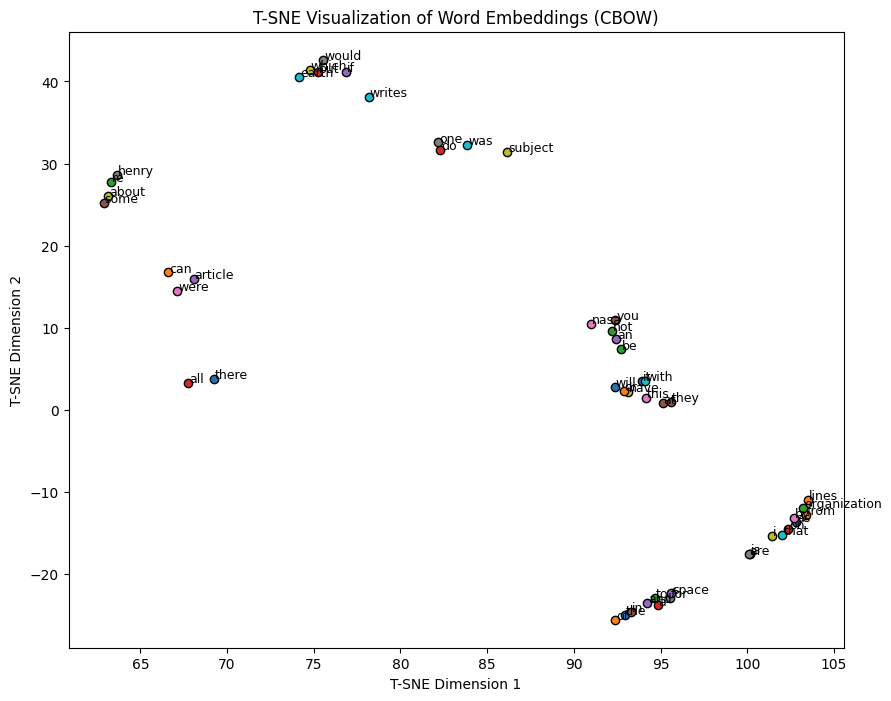

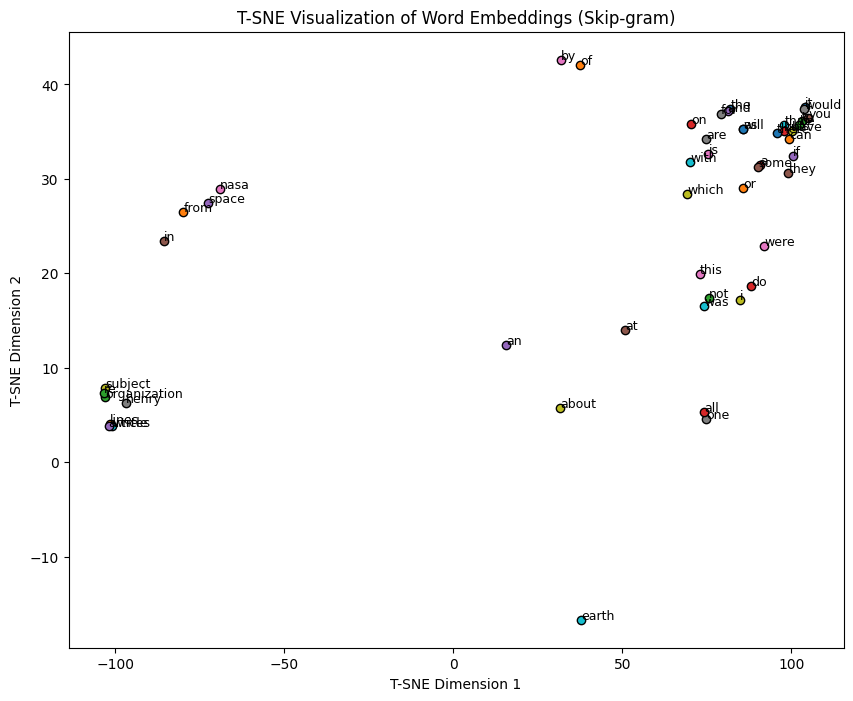

In [11]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Ensure NLTK tokenizer is available
nltk.download('punkt')

# Load the 20 Newsgroups dataset
categories = ['sci.space']
newsgroups = fetch_20newsgroups(subset='train', categories=categories)
texts = newsgroups.data[:100]  # Use the first 100 documents

# --------------------------------------------------------
# Step 1: Extract N-Grams
# --------------------------------------------------------
# Here we extract unigrams and bigrams as features
vectorizer = CountVectorizer(ngram_range=(1, 2))  # unigrams + bigrams
X = vectorizer.fit_transform(texts)
ngrams = vectorizer.get_feature_names_out()

# Print N-Grams (show only first 50 for readability)
print("Sample N-Grams (first 50):")
print(ngrams[:50])

# --------------------------------------------------------
# Step 2: Tokenize Text for Word2Vec
# --------------------------------------------------------
tokenized_sentences = []
for doc in texts:
    tokens = word_tokenize(doc.lower())
    # Keep only alphabetic tokens to clean up the text a bit
    tokens = [t for t in tokens if t.isalpha()]
    if tokens:
        tokenized_sentences.append(tokens)

print(f"\nNumber of tokenized sentences: {len(tokenized_sentences)}")

# --------------------------------------------------------
# Step 3: Train Word2Vec Model (CBOW)
# --------------------------------------------------------
# sg=0 -> CBOW, sg=1 -> Skip-gram
model_cbow = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=50,
    window=5,
    min_count=5,
    sg=0,          # CBOW
    workers=4
)

# --------------------------------------------------------
# Step 4: Extract Word Embeddings for Visualization (CBOW)
# --------------------------------------------------------
words_cbow = list(model_cbow.wv.index_to_key)
embeddings_cbow = np.array([model_cbow.wv[word] for word in words_cbow])

# --------------------------------------------------------
# Step 5: Reduce Dimensionality with T-SNE (CBOW)
# --------------------------------------------------------
tsne_cbow = TSNE(n_components=2, random_state=42, perplexity=5)
embeddings_cbow_2d = tsne_cbow.fit_transform(embeddings_cbow)

# --------------------------------------------------------
# Step 6: Visualize Word Embeddings (CBOW)
# --------------------------------------------------------
plt.figure(figsize=(10, 8))
max_words = min(50, len(words_cbow))  # plot at most 50 words
for i, word in enumerate(words_cbow[:max_words]):
    x, y = embeddings_cbow_2d[i]
    plt.scatter(x, y, edgecolors='k')
    plt.text(x + 0.05, y + 0.05, word, fontsize=9)

plt.title("T-SNE Visualization of Word Embeddings (CBOW)")
plt.xlabel("T-SNE Dimension 1")
plt.ylabel("T-SNE Dimension 2")
plt.show()

# --------------------------------------------------------
# Extra: Train Word2Vec Model (Skip-gram) for Comparison
# --------------------------------------------------------
model_sg = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=50,
    window=5,
    min_count=5,
    sg=1,          # Skip-gram
    workers=4
)

words_sg = list(model_sg.wv.index_to_key)
embeddings_sg = np.array([model_sg.wv[word] for word in words_sg])

tsne_sg = TSNE(n_components=2, random_state=42, perplexity=5)
embeddings_sg_2d = tsne_sg.fit_transform(embeddings_sg)

plt.figure(figsize=(10, 8))
max_words_sg = min(50, len(words_sg))
for i, word in enumerate(words_sg[:max_words_sg]):
    x, y = embeddings_sg_2d[i]
    plt.scatter(x, y, edgecolors='k')
    plt.text(x + 0.05, y + 0.05, word, fontsize=9)

plt.title("T-SNE Visualization of Word Embeddings (Skip-gram)")
plt.xlabel("T-SNE Dimension 1")
plt.ylabel("T-SNE Dimension 2")
plt.show()